In [1]:

import pandas as pd
import urllib


url = 'https://bit.ly/fish_csv'
urllib.request.urlretrieve(url,'fish.csv')
fish = pd.read_csv('fish.csv')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_X = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
fish_X[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [6]:
fish_Y = fish['Species'].to_numpy()

In [7]:
fish_Y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(fish_X, fish_Y, random_state=42)

In [9]:
train_X[:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_X)
train_X_scaled = ss.transform(train_X)
test_X_scaled = ss.transform(test_X)

In [12]:
from pickle import dump, load

dump(ss, open('4-01_ss.pkl','wb'))

In [13]:
ss = load(open('4-01_ss.pkl', 'rb'))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_X_scaled, train_Y)
print(kn.score(train_X_scaled, train_Y))
print(kn.score(test_X_scaled, test_Y))

0.7983193277310925
0.85


In [16]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [17]:
print(kn.predict(test_X_scaled))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Roach' 'Pike' 'Bream' 'Perch'
 'Roach' 'Perch' 'Parkki' 'Perch']


In [20]:
import numpy as np
proba = kn.predict_proba(test_X_scaled)
print(np.round(proba,decimals=3))

[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.6 0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.

In [21]:
dist, idx = kn.kneighbors(test_X_scaled[3:4])
print(train_Y[idx])

[['Roach' 'Perch' 'Perch' 'Perch' 'Perch']]


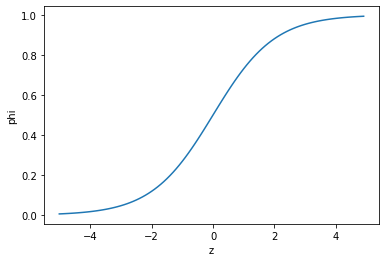

In [22]:
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1 / (1+ np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [26]:
char_arr = np.array(['A','B','C','D'])
print(char_arr[[True,False,False,True]])

['A' 'D']


In [27]:
train_Y[:5]

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [28]:
bream_smelt_only = (train_Y == 'Bream') | (train_Y == 'Smelt')

In [29]:
bream_smelt_only[:10]

array([ True, False,  True, False, False, False, False,  True, False,
       False])

In [30]:
train_bream_smelt_X = train_X_scaled[bream_smelt_only]
train_bream_smelt_Y = train_Y[bream_smelt_only]

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt_X, train_bream_smelt_Y)

LogisticRegression()

In [32]:
lr.predict(train_bream_smelt_X[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [33]:
print(lr.predict_proba(train_bream_smelt_X[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [34]:
print(lr.classes_)

['Bream' 'Smelt']


In [35]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [36]:
train_bream_smelt_X[:1]

array([[0.91965782, 0.60943175, 0.81041221, 1.85194896, 1.00075672]])

In [37]:
decisions = lr.decision_function(train_bream_smelt_X[:5])

In [38]:
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [39]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [67]:
lr2 = LogisticRegression(C=10,max_iter=1000)

lr2.fit(train_X_scaled, train_Y)

LogisticRegression(C=10, max_iter=1000)

In [68]:
print(lr2.score(train_X_scaled,train_Y))
print(lr2.score(test_X_scaled, test_Y))

0.9159663865546218
0.925


In [44]:
result = lr2.predict(test_X_scaled[:5])

In [45]:
result

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [48]:
print(np.round(lr2.predict_proba(test_X_scaled[:5]),decimals=2))

[[0.   0.09 0.54 0.01 0.28 0.06 0.01]
 [0.   0.06 0.13 0.   0.09 0.72 0.  ]
 [0.01 0.01 0.22 0.57 0.17 0.01 0.01]
 [0.06 0.08 0.53 0.04 0.26 0.   0.04]
 [0.   0.03 0.66 0.03 0.24 0.02 0.01]]


In [49]:
lr2.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [51]:
print(lr2.coef_.shape, lr2.intercept_.shape)

(7, 5) (7,)


In [53]:
decision = lr2.decision_function(test_X_scaled[:10])
print(np.round(decision,decimals=3))

[[ -2.354   0.755   2.538  -1.674   1.874   0.351  -1.49 ]
 [ -4.168   1.384   2.105  -1.997   1.731   3.847  -2.902]
 [ -1.445  -1.482   1.729   2.665   1.457  -1.835  -1.089]
 [  0.02    0.257   2.177  -0.518   1.459  -3.002  -0.394]
 [ -2.219  -0.268   2.843  -0.4     1.845  -0.743  -1.059]
 [  7.302   1.494   1.48   -0.884  -0.53  -11.192   2.331]
 [ -4.722   1.397   2.422  -2.309   1.803   4.436  -3.026]
 [ -0.814   0.027   2.119  -0.226   1.684  -2.034  -0.757]
 [ -1.204  -0.114   2.735  -0.571   1.779  -2.021  -0.604]
 [  2.171  -5.563   4.897   7.284  -0.504 -10.919   2.636]]


In [54]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print((np.round(proba, decimals=3)))

[[0.004 0.092 0.545 0.008 0.281 0.061 0.01 ]
 [0.    0.061 0.126 0.002 0.087 0.722 0.001]
 [0.009 0.009 0.223 0.569 0.17  0.006 0.013]
 [0.061 0.077 0.526 0.036 0.257 0.003 0.04 ]
 [0.004 0.03  0.664 0.026 0.245 0.018 0.013]
 [0.987 0.003 0.003 0.    0.    0.    0.007]
 [0.    0.038 0.106 0.001 0.057 0.797 0.   ]
 [0.027 0.062 0.502 0.048 0.325 0.008 0.028]
 [0.013 0.038 0.648 0.024 0.249 0.006 0.023]
 [0.005 0.    0.083 0.903 0.    0.    0.009]]


In [55]:
dump(lr2, open('4-01_lr2.pkl','wb'))